# Contents

### 1. Import libraries and data
### 2. Data checks
### 3. Task
    3.1. Address PII in data.
    3.2. Create a regional segmentation of the data.
    3.3 Explore region and spending habits.
### 4. Export files
    


## 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Naming Path for file retrieval 
path = r'C:\Users\ruthf\OneDrive\Documents\Data Immersion\Achievement 4\07-2022 Instacart Basket Analysis'

In [4]:
# Import full data pkl
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'full_instacart_data.pkl'))

## 2. Data checks

In [5]:
df.head()

order_id user_id  order_number  order_day_of_week  order_hour_of_day  \
0   2539329       1             1                  2                  8   
1   2398795       1             2                  3                  7   
2    473747       1             3                  3                 12   
3   2254736       1             4                  4                  7   
4    431534       1             5                  4                 15   

   days_since_previous_order  product_id  add_to_cart_order  reordered _merge  \
0                        NaN         196                  1          0   both   
1                       15.0         196                  1          1   both   
2                       21.0         196                  1          1   both   
3                       29.0         196                  1          1   both   
4                       28.0         196                  1          1   both   

   ...         frequency_flag  first_name  surname  gender    state age  \
0  ...  Non-frequent customer       Linda   Nguyen  Female  Alabama  31   
1  ...  Non-frequent customer       Linda   Nguyen  Female  Alabama  31   
2  ...  Non-frequent customer       Linda   Nguyen  Female  Alabama  31   
3  ...  Non-frequent customer       Linda   Nguyen  Female  Alabama  31   
4  ...  Non-frequent customer       Linda   Nguyen  Female  Alabama  31   

  date_joined no_of_dependants  marital_status income  
0   2/17/2019                3         married  40423  
1   2/17/2019                3         married  40423  
2   2/17/2019                3         married  40423  
3   2/17/2019                3         married  40423  
4   2/17/2019                3         married  40423  

[5 rows x 33 columns]

In [6]:
df.shape

(32404859, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   order_id                          int64   
 1   user_id                           object  
 2   order_number                      int8    
 3   order_day_of_week                 int8    
 4   order_hour_of_day                 int8    
 5   days_since_previous_order         float32 
 6   product_id                        int32   
 7   add_to_cart_order                 int8    
 8   reordered                         int8    
 9   _merge                            category
 10  product_name                      object  
 11  aisle_id                          int8    
 12  department_id                     int8    
 13  prices                            float32 
 14  price_range                       object  
 15  busiest_day                       object  
 16  busiest_2_days  

In [8]:
df.isnull().sum()

order_id                                  0
user_id                                   0
order_number                              0
order_day_of_week                         0
order_hour_of_day                         0
days_since_previous_order           2076096
product_id                                0
add_to_cart_order                         0
reordered                                 0
_merge                                    0
product_name                              0
aisle_id                                  0
department_id                             0
prices                                 5127
price_range                               0
busiest_day                               0
busiest_2_days                            0
busiest_period_of_day                     0
max_order                                 0
loyalty_flag                              0
mean_price                                0
spending_flag                             0
median_days_since_previous_order

### The missing values in days_since_previous_order have been identified as being related to a customers first order so are fine to be included.  The missing values in prices where input previously where prices were errors (e.g price of 99,999).
### The missing values in median_days_since_previous_order and frequency_flag are assigned to one customer (user_id 159838) who has only ever placed 1 order, as investigated below.

In [9]:
# Checking where missing values in median_days_since_previous_order are.
df[df['median_days_since_previous_order'].isnull()==True]

order_id user_id  order_number  order_day_of_week  \
32377906    895835  159838             1                  0   
32377907    895835  159838             1                  0   
32377908    895835  159838             1                  0   
32377909    895835  159838             1                  0   
32377910    895835  159838             1                  0   

          order_hour_of_day  days_since_previous_order  product_id  \
32377906                 17                        NaN       10749   
32377907                 17                        NaN       33401   
32377908                 17                        NaN       23695   
32377909                 17                        NaN       21334   
32377910                 17                        NaN       22198   

          add_to_cart_order  reordered _merge  ... frequency_flag  first_name  \
32377906                  3          0   both  ...            NaN       Jason   
32377907                  6          0   both  ...            NaN       Jason   
32377908                  2          0   both  ...            NaN       Jason   
32377909                  5          0   both  ...            NaN       Jason   
32377910                  1          0   both  ...            NaN       Jason   

          surname  gender     state age date_joined no_of_dependants  \
32377906     Nava    Male  Arkansas  63   11/9/2018                3   
32377907     Nava    Male  Arkansas  63   11/9/2018                3   
32377908     Nava    Male  Arkansas  63   11/9/2018                3   
32377909     Nava    Male  Arkansas  63   11/9/2018                3   
32377910     Nava    Male  Arkansas  63   11/9/2018                3   

          marital_status  income  
32377906         married  140994  
32377907         married  140994  
32377908         married  140994  
32377909         married  140994  
32377910         married  140994  

[5 rows x 33 columns]

In [10]:
# Checking that user_id 159838 has indeed only placed one order
df[df['user_id']=='159838']

order_id user_id  order_number  order_day_of_week  \
32377906    895835  159838             1                  0   
32377907    895835  159838             1                  0   
32377908    895835  159838             1                  0   
32377909    895835  159838             1                  0   
32377910    895835  159838             1                  0   

          order_hour_of_day  days_since_previous_order  product_id  \
32377906                 17                        NaN       10749   
32377907                 17                        NaN       33401   
32377908                 17                        NaN       23695   
32377909                 17                        NaN       21334   
32377910                 17                        NaN       22198   

          add_to_cart_order  reordered _merge  ... frequency_flag  first_name  \
32377906                  3          0   both  ...            NaN       Jason   
32377907                  6          0   both  ...            NaN       Jason   
32377908                  2          0   both  ...            NaN       Jason   
32377909                  5          0   both  ...            NaN       Jason   
32377910                  1          0   both  ...            NaN       Jason   

          surname  gender     state age date_joined no_of_dependants  \
32377906     Nava    Male  Arkansas  63   11/9/2018                3   
32377907     Nava    Male  Arkansas  63   11/9/2018                3   
32377908     Nava    Male  Arkansas  63   11/9/2018                3   
32377909     Nava    Male  Arkansas  63   11/9/2018                3   
32377910     Nava    Male  Arkansas  63   11/9/2018                3   

          marital_status  income  
32377906         married  140994  
32377907         married  140994  
32377908         married  140994  
32377909         married  140994  
32377910         married  140994  

[5 rows x 33 columns]

## 3. Task

## 3.1. Address PII in data.  Newly merged data has PII in the form of customers first names and surnames.  

### Can drop these columns for the purpose of the analysis.

## 3.2. Create a regional segmentation of the data. 

In [11]:
df['state'].nunique()

51

In [12]:
# Assigning regions to states
Northeast = ('Maine','New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 
             'New Jersey')
Midwest = ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas',
           'Minnesota', 'Iowa', 'Missouri')
South = ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 
         'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana')
West = ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon',
        'California', 'Hawaii')

In [13]:
# Creating new region column based on state
df.loc[df['state'].isin (Northeast), 'region'] = 'Northeast'
df.loc[df['state'].isin (Midwest), 'region'] = 'Midwest'


In [14]:
df.loc[df['state'].isin (South), 'region'] = 'South'
df.loc[df['state'].isin (West), 'region'] = 'West'

In [15]:
df.head()

order_id user_id  order_number  order_day_of_week  order_hour_of_day  \
0   2539329       1             1                  2                  8   
1   2398795       1             2                  3                  7   
2    473747       1             3                  3                 12   
3   2254736       1             4                  4                  7   
4    431534       1             5                  4                 15   

   days_since_previous_order  product_id  add_to_cart_order  reordered _merge  \
0                        NaN         196                  1          0   both   
1                       15.0         196                  1          1   both   
2                       21.0         196                  1          1   both   
3                       29.0         196                  1          1   both   
4                       28.0         196                  1          1   both   

   ... first_name  surname  gender    state age date_joined no_of_dependants  \
0  ...      Linda   Nguyen  Female  Alabama  31   2/17/2019                3   
1  ...      Linda   Nguyen  Female  Alabama  31   2/17/2019                3   
2  ...      Linda   Nguyen  Female  Alabama  31   2/17/2019                3   
3  ...      Linda   Nguyen  Female  Alabama  31   2/17/2019                3   
4  ...      Linda   Nguyen  Female  Alabama  31   2/17/2019                3   

  marital_status  income region  
0        married   40423  South  
1        married   40423  South  
2        married   40423  South  
3        married   40423  South  
4        married   40423  South  

[5 rows x 34 columns]

In [16]:
df['region'].value_counts()

South        10791885
Midwest       7597325
West          6989924
Northeast     5722736
Name: region, dtype: int64

In [17]:
# Export file
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'full_instacart_data_region.pkl'))

## 3.3. Explore region and spending habits

In [18]:
df.groupby('region').agg({'prices':['sum','mean']})

prices          
                  sum      mean
region                         
Midwest    59192976.0  7.792584
Northeast  44530104.0  7.782409
South      84107912.0  7.794918
West       54432808.0  7.788546

In [19]:
# Looking at total spend by region
df.groupby('region').agg({'prices':sum}).sort_values(by = 'prices', ascending = False)

prices
region               
South      84107912.0
Midwest    59192976.0
West       54432808.0
Northeast  44530104.0

The South is the highest spending region.  There is little difference in the average price between regions.

In [21]:
# Looking at unique users by region
df.groupby('region').agg({'user_id':'nunique'}).sort_values(by = 'user_id', ascending = False)

user_id
region            
South        68737
Midwest      48519
West         44478
Northeast    36388

There are also more customers in the South.  The spend is linked to the number of customers and each region follows the trend of as the users increase so does the total spend.

In [22]:
# Table showing total spend, number of users and number if orders by region.
df.groupby('region').agg({'prices':'sum', 'user_id':'nunique', 'order_id':'nunique'}).sort_values(by = 'prices', ascending = False)

prices  user_id  order_id
region                                  
South      84107912.0    68737   1071562
Midwest    59192976.0    48519    754275
West       54432808.0    44478    693047
Northeast  44530104.0    36388    567162

In [23]:
# Create a summary table with only the columns needed.
df_region = df[['region','prices','user_id','order_id','product_id']]

In [24]:
df_region.shape

(32404859, 5)

In [25]:
# Renaming columns to more appropriate headings.
df_region = df_region.rename(columns = {'prices':'total_spend','user_id':'customer_count','order_id':'order_count','product_id': 'product_count'})

In [26]:
# Updating df_region to be at summary level by region
df_region = df_region.groupby('region').agg({'total_spend': 'sum', 'customer_count':'nunique', 'order_count':'nunique','product_count':'count'}).sort_values(by = 'total_spend', ascending = False)

In [27]:
df_region

total_spend  customer_count  order_count  product_count
region                                                            
South       84107912.0           68737      1071562       10791885
Midwest     59192976.0           48519       754275        7597325
West        54432808.0           44478       693047        6989924
Northeast   44530104.0           36388       567162        5722736

In [101]:
# Calculate average spend per order, average spend per customer, average number of orders by customer, 
# average number of products per order

In [28]:
df_region['average_order_value'] = df_region['total_spend']/df_region['order_count']
df_region['average_customer_spend'] = df_region['total_spend']/df_region['customer_count']
df_region['average_orders_by_customer'] = df_region['order_count']/df_region['customer_count']
df_region['products_per_order'] = df_region['product_count']/df_region['order_count'] 

In [29]:
df_region

total_spend  customer_count  order_count  product_count  \
region                                                               
South       84107912.0           68737      1071562       10791885   
Midwest     59192976.0           48519       754275        7597325   
West        54432808.0           44478       693047        6989924   
Northeast   44530104.0           36388       567162        5722736   

           average_order_value  average_customer_spend  \
region                                                   
South                78.490943             1223.619186   
Midwest              78.476651             1219.995795   
West                 78.541294             1223.814200   
Northeast            78.513906             1223.757942   

           average_orders_by_customer  products_per_order  
region                                                     
South                       15.589304           10.071172  
Midwest                     15.545972           10.072354  
West                        15.581793           10.085786  
Northeast                   15.586512           10.090126

There isn't much difference between the regions in terms of average order value, customer spend, orders by customer and products per order indicating the higher sales value in the South is driven by larger or higher value orders and seems to be down to the increased number of customers in the South. Demonstrated in the scatterplot below.

<AxesSubplot:xlabel='total_spend', ylabel='customer_count'>

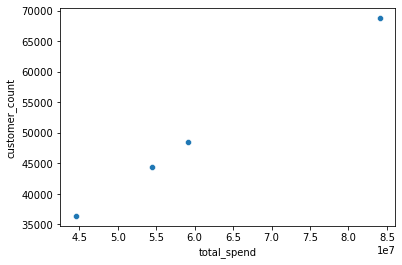

In [33]:
sns.scatterplot(x='total_spend',y='customer_count',data=df_region)

## 4. Export Files

### I ran in to RAM issues trying to complete next part of task so I re ran the script and exported at this point in order to drop columns and reduce file size in another notebook.

In [ ]:
df.shape()

In [17]:
# Export full data file
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'full_instacart_data_region.pkl'))

## 3.4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [34]:
# Creating flag as boolean to save RAM
df.loc[df['max_order']<5,'activity_flag'] = 1
df.loc[df['max_order']>=5, 'activity_flag'] = 0

In [35]:
# Checking flag applied. 1,440,295 low-activity customers
df['activity_flag'].value_counts()

0.0    30964564
1.0     1440295
Name: activity_flag, dtype: int64

In [36]:
# Checking flag was correct
df.groupby('activity_flag').agg({'max_order':'max'})

max_order
activity_flag           
0.0                   99
1.0                    4

In [37]:
# Changing data type to reduce file size
df['activity_flag'].dtypes

dtype('float64')

In [38]:
#change data type to int8
df['activity_flag']=df['activity_flag'].astype('int8')

In [39]:
df['activity_flag'].dtypes

dtype('int8')

In [43]:
# Creating new data frame excluding low-activity customers
df_2 = df[df['activity_flag']==0]

MemoryError: Unable to allocate 3.69 GiB for an array with shape (16, 30964564) and data type object

In [37]:
# Checking shape is correct with 30,964,564 rows
df_2.shape

(30964564, 35)

In [38]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404854
Data columns (total 35 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   order_id                          int64   
 1   user_id                           object  
 2   order_number                      int8    
 3   order_day_of_week                 int8    
 4   order_hour_of_day                 int8    
 5   days_since_previous_order         float32 
 6   product_id                        int32   
 7   add_to_cart_order                 int8    
 8   reordered                         int8    
 9   _merge                            category
 10  product_name                      object  
 11  aisle_id                          int8    
 12  department_id                     int8    
 13  prices                            float32 
 14  price_range                       object  
 15  busiest_day                       object  
 16  busiest_2_days  

In [39]:
df_2.drop(columns=['_merge','first_name','surname'])

MemoryError: Unable to allocate 3.23 GiB for an array with shape (14, 30964564) and data type object

In [40]:
# Export new df_2 to pkl
df_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'full_instacart_data_ex_low_activity_customers.pkl'))

MemoryError: 